# Plot and fit experimental data

In this exercise you are given a dataset consisting of several columns: the first column represents time, the other columns are (fake) data from an experiment in which we measure the activity of a neuron/signal of an eeg electrode/voxel in an fmri experiment. This activation can be modeled as a gaussian peak with an unknown amplitude and width. The goals of this exercise are

1. Fit and plot the results for one of the experimental data columns with a custom made gaussian function:
    - import the data with numpy
    - define a gaussian function for the fit, this will be a python function that will need as input parameters the x variable and the parameters of the gaussian, and will return the values of the corresponding gaussian function.
    - import and use curve_fit from scipy.optimize for fitting your previously defined function to the data
    - plot the data and the corresponding fit, with the data represented as points and the fit as a line, and include a legend.
    - store the output parameters in a list or numpy array and save them in a file parameters.txt
    - save the figure in a file called fit_{column_number}.png.


2. Fit and plot the results for all the experimental data columns:
    - This will be exactly the same as the earlier part, but in this case you will iterate the procedure (no copy paste) for all the columns in the input file.
    - store all the output parameters in a list or numpy array and save them in a file parameters.txt
    - save the figures in a file called fit_{column_number}.png.
    - make a scatterplot of the amplitude and standard deviations obtained from the fits and save it as a figure.


<b>Tips</b>
- use shape to make sure you are reading the file correctly
- A generic gaussian function is defined as;
$$G(x) = A\exp{-\frac{(x-x_0)^2}{2\sigma^2}},$$
where $A$ is the amplitude, $x_0$ the center and $\sigma$ the standard deviation.
- Read the documentation of curve_fit to understand how to use it

<b>Some fits are not looking good, are they?</b>
When fitting a gaussian it might be important to give to the fitting function some starting parameters that you think are close to the actual result. A good ide could be to assume the peak is in the middle and to have a rough estimate of its width and amplitude before launching the fit. You can input these parameters in curve_fit as an optional argument, e.g., curve_fit(......., p0 = [4,50,3]).

In [18]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def gaus(x,A,x0,s):
    return A*np.exp(-(x-x0)**2/(2*s**2))

In [22]:
data_dir = 'C:/Users/deangelis/Documents/python4onwar/3 - Matplotlib/'
data_file = 'experiment_020920.txt'
t_data = np.loadtxt(data_dir + data_file)
t = t_data[:,0]
data = t_data[:,1:]
Nexp = data.shape[1]

Text(0.5, 0, 'time (s)')

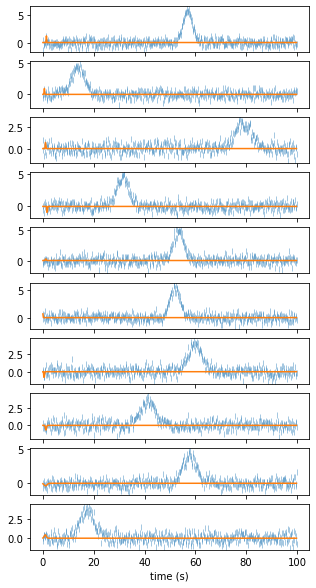

In [25]:
pars = []

fig,ax = plt.subplots(nrows=Nexp,sharex = True, figsize=(5,10))

for i in range(Nexp):
    p,pcorr = curve_fit(gaus,t,data[:,i])
    ax[i].plot(t,data[:,i],'|',label = 'data', alpha = 0.4)
    ax[i].plot(t,gaus(t,p[0],p[1],p[2]),'-',label = 'fit')
    pars.append(p)
    
ax[-1].set_xlabel('time (s)')

Not so good...

Now I improve my guess on the central point of the gaussian
Assuming that it will be close to the maximum in my data

Text(0.5, 0, 'time (s)')

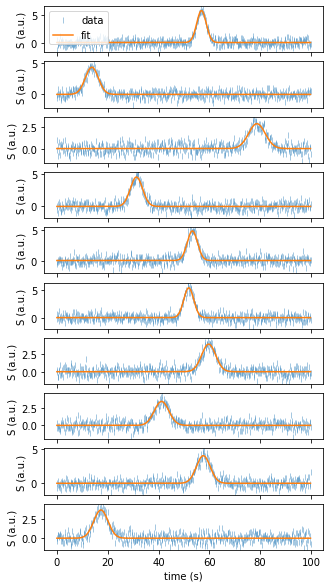

In [26]:
pars = []

fig,ax = plt.subplots(nrows=Nexp,sharex = True, figsize=(5,10))

for i in range(Nexp):
    
    ## Here I compute my guess
    max_loc = np.argmax(data[:,i])    
    t_max = t[max_loc]
    ampl = np.max(data[:,i])
    #####
    
    p,pcorr = curve_fit(gaus,t,data[:,i],p0=[ampl,t_max,1])
    ax[i].plot(t,data[:,i],'|',label = 'data', alpha = 0.4)
    ax[i].plot(t,gaus(t,p[0],p[1],p[2]),'-',label = 'fit')
    ax[i].set_ylabel('S (a.u.)')
    pars.append(p)
    

ax[0].legend()    
ax[Nexp-1].set_xlabel('time (s)')

In [27]:
pars = np.array(pars)
amps = pars[:,0]
sigmas = pars[:,2]

In [28]:
np.savetxt(data_dir + 'fit_parameters.txt', pars, header = 'ampl\tt0\tsigma', delimiter = '\t', fmt = '%.3f')

Here I am plotting amplitude versus standard deviation to check whether there is a correlation

Text(0, 0.5, 'Standard Deviation')

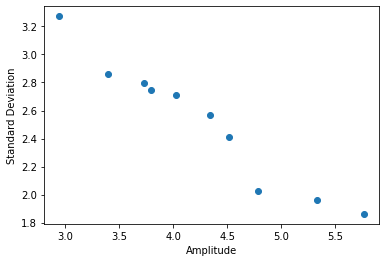

In [30]:
plt.scatter(amps,sigmas)
plt.xlabel('Amplitude')
plt.ylabel('Standard Deviation')

In [31]:
from scipy.stats import pearsonr

pearsonr(amps,sigmas)

(-0.9745088241858325, 1.7913905977198793e-06)

# If you are curious this is how I generated the data

In [32]:
Nt = 500
Nexp = 10
dt = 0.2
T = dt*Nt
t = np.arange(Nt)*dt
data = np.random.normal(0,0.5,(Nt,Nexp))
data.shape

(500, 10)

In [33]:
delta_T = 10
for i in range(Nexp):
    s = np.random.normal(3,0.75)
    A = 25/(s*np.sqrt(2*np.pi)) + np.random.rand()/2
    x0 = np.random.rand() * (T - 2*delta_T) + delta_T
    print(s,A)
    data[:,i] += gaus(t,A,x0,s)

3.325712312877753 3.039117167969641
4.035575764933695 2.6006619295451263
4.443733341849976 2.559947859998981
3.256548023233274 3.3768935010028676
2.4636323624595016 4.472089275711191
1.3037292502380864 7.781172209571966
2.0134475882627654 4.958335865112231
3.855445188304091 2.67917432420968
3.112589112913353 3.4854645322441926
2.5727939337170653 3.932900941877804


In [34]:
data = data.T

In [35]:
data.shape

(10, 500)

In [36]:
t.shape

(500,)

In [37]:
t_data = np.append(np.array([t]),data,axis = 0)
t_data = np.transpose(t_data)
t_data.shape

(500, 11)

In [38]:
np.savetxt('experiment_020920.txt',t_data,
           fmt = '%.4f', header = 't (s)\tIntensity (a.u.)', delimiter = '\t')